# <div style="background-color: lightblue; padding: 8px;">Melanoma Detection Assignment</div>

## Introduction:
- In this assignment, you will build a multiclass classification model using a custom convolutional neural network in TensorFlow..

## Problem Statement
To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution that can evaluate images and alert dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

The dataset consists of 2357 images of malignant and benign oncological diseases, which were formed from the International Skin Imaging Collaboration (ISIC). All images were sorted according to the classification taken with ISIC, and all subsets were divided into the same number of images, with the exception of melanomas and moles, whose images are slightly dominant.


The data set contains the following diseases:

Actinic keratosis

Basal cell carcinoma

Dermatofibroma

Melanoma

Nevus

Pigmented benign keratosis

Seborrheic keratosis

Squamous cell carcinoma

Vascular lesion


**Mount Gdrive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing Skin Cancer Data**

##Importing libraries and packages

In [2]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from glob import glob
from tensorflow import keras
from tensorflow.keras.models import Sequential
# Import the load_img function from Keras for loading images
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras import layers, models
# Import the Adam optimizer from Keras for optimization during model training
from tensorflow.keras.optimizers import Adam

# Import specific callback functions from Keras for model training callbacks
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D


## Data reading and understanding

In [3]:
# Defining the path for train and test images
## Paths of train and test dataset on Google drive

data_dir_train = pathlib.Path("/content/drive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path("/content/drive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Test")

# List the files in the training set and test set
print(f"Training files: {list(data_dir_train.glob('*'))}")
print(f"Testing files: {list(data_dir_test.glob('*'))}")

Training files: [PosixPath('/content/drive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion'), PosixPath('/content/drive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma'), PosixPath('/content/drive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus'), PosixPath('/content/drive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma'), PosixPath('/content/drive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis'), PosixPath('/content/drive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis'), PosixPath('/content/drive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma'), PosixPath('/content/drive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic kerato

In [4]:
# Count the number of images in the training data set
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
# Print the count of images in the training directory
print("Number of images in the training directory:", image_count_train)

# Count the number of images in the test data set
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
# Print the count of images in the test directory
print("Number of images in the test directory:", image_count_test)

Number of images in the training directory: 2284
Number of images in the test directory: 128


## Load using keras.preprocessing

## Create a dataset
**Define some parameters for the loader:**

In [5]:
batch_size = 32
img_height = 180
img_width = 180

**Using 80% of the images for training, and 20% for validation.**

In [6]:
## Using our train dataset here
## seed=123 while creating our dataset using tf.keras.preprocessing.image_dataset_from_directory

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2784 files belonging to 9 classes.
Using 2228 files for training.


In [7]:
## writing our validation dataset here

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2784 files belonging to 9 classes.
Using 556 files for validation.


In [8]:
## Writing our test dataset here
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_test,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 128 files belonging to 9 classes.


In [9]:
# List out all the classes of skin cancer and store them in a list.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


## Visualize the data
Visualize one instance of all the nine classes present in the dataset

Found 2784 files belonging to 9 classes.


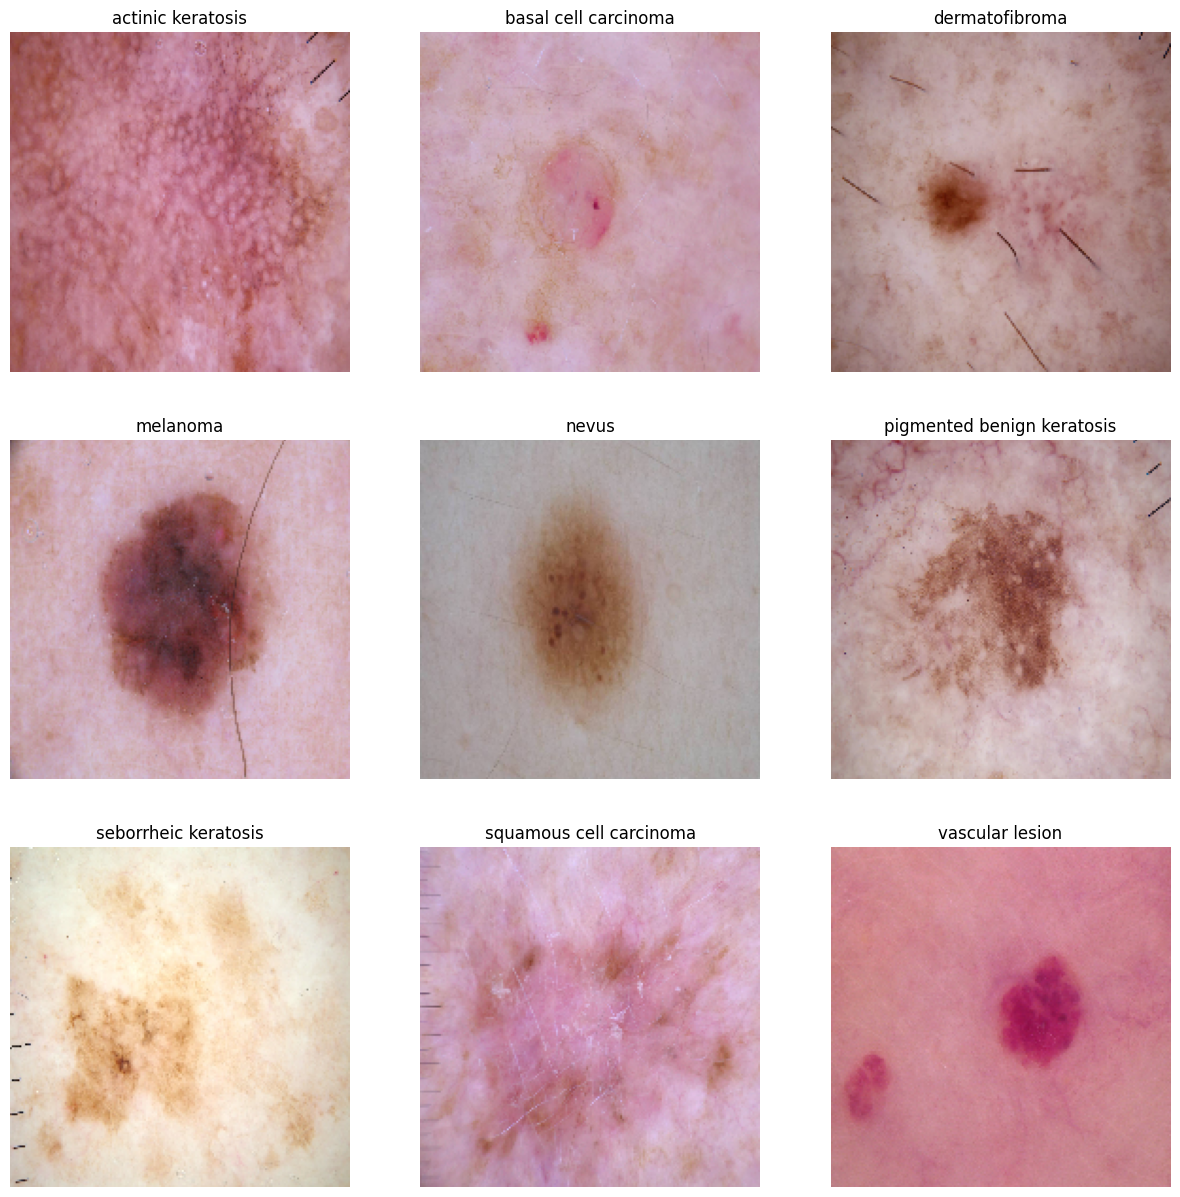

In [10]:
# Visualizing One Instance from Each Class in the Dataset

# Using image_dataset_from_directory() to create a dataset that yields batches of labeled images
# label_mode is set to 'categorical' for one-hot encoding of class labels
image_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train, batch_size=32, image_size=(180, 180), label_mode='categorical', seed=123
)

# Get the names of all the classes (skin cancer types)
class_names = image_dataset.class_names

# Dictionary to store image paths for each class
files_path_dict = {}

# Loop through each class to gather image paths
for c in class_names:
    files_path_dict[c] = list(map(lambda x: str(data_dir_train) + '/' + c + '/' + x, os.listdir(str(data_dir_train) + '/' + c)))

# Visualize an image from each class
plt.figure(figsize=(15, 15))
index = 0
for c in class_names:
    path_list = files_path_dict[c][:1]
    index += 1
    plt.subplot(3, 3, index)

    # Load and display the image
    plt.imshow(load_img(path_list[0], target_size=(180, 180)))
    plt.title(c)
    plt.axis("off")

The image_batch is a tensor of the shape (32, 180, 180, 3). This is a batch of 32 images of shape 180x180x3 (the last dimension refers to color channels RGB). The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.



In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

**Dataset.cache()** : keeps the images in memory after they're loaded off disk during the first epoch.

**Dataset.prefetch()** : overlaps data preprocessing and model execution while training.

## Create CNN model
Create a CNN model here, which can accurately detect 9 classes present in the dataset. Useing layers.experimental.preprocessing.Rescaling to normalize pixel values between (0,1). The RGB channel values are in the [0, 255] range. This is not ideal for a neural network. Here, it is good to standardize values to be in the [0, 1]

In [12]:
# CNN Model Architecture

# Sequential allows you to create models layer-by-layer
model = Sequential()

# Rescaling Layer: Scale input pixel values to the [0, 1] range
model.add(tf.keras.layers.Rescaling(1./255, input_shape=(180, 180, 3)))

# First Convolutional layer
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))

# Second Convolutional Layer
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))

# Third Convolutional Layer
model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))

# Dropout layer with 50% Fraction of the input units to drop
model.add(layers.Dropout(0.5))

# Flatten Layer: Convert multi-dimensional input tensors into a single dimension
model.add(layers.Flatten())

# Dense Layer: Fully connected layer with 128 units and ReLU activation
model.add(layers.Dense(128, activation='relu'))

# Dropout layer with 25% Fraction of the input units to drop
model.add(layers.Dropout(0.25))

# Dense Layer with softmax activation function
# Softmax scales logits into probabilities
model.add(layers.Dense(len(class_names), activation='softmax'))

# Display model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       6,553,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,648,137 (25.36 MB)

 Trainable params: 6,648,137 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

**Compile the model**

In [13]:
# Compile the Model

# Compile the model with Adam optimization
# Adam is a stochastic gradient descent method with adaptive estimation of moments
# Categorical crossentropy is used as the loss function for multi-class classification
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # For integer labels
              metrics=['accuracy'])

# ModelCheckpoint callback is used to save the model or weights at specific intervals
# It saves the best model based on the validation accuracy
# The saved model can be loaded later to continue training from the saved state
checkpoint = ModelCheckpoint("model.keras", monitor="val_accuracy", save_best_only=True, mode="auto", verbose=1)

# EarlyStopping callback is used to stop training when a monitored metric stops improving
# It helps prevent overfitting by stopping training when validation accuracy plateaus
earlystop = EarlyStopping(monitor="val_accuracy", patience=5, mode="auto", verbose=1)

## Train the model

In [14]:
# Set the number of training epochs
epochs =20
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)


Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 483s 4s/step - accuracy: 0.1995 - loss: 2.0501 - val_accuracy: 0.2554 - val_loss: 1.9133
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 195s 2s/step - accuracy: 0.3701 - loss: 1.7320 - val_accuracy: 0.4478 - val_loss: 1.5684
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 171s 2s/step - accuracy: 0.4444 - loss: 1.5761 - val_accuracy: 0.5342 - val_loss: 1.3999
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 207s 3s/step - accuracy: 0.5062 - loss: 1.3914 - val_accuracy: 0.5540 - val_loss: 1.3583
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 173s 2s/step - accuracy: 0.5436 - loss: 1.2873 - val_accuracy: 0.5216 - val_loss: 1.3721
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 171s 2s/step - accuracy: 0.5641 - loss: 1.2336 - val_accuracy: 0.5701 - val_loss: 1.3132
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 171s 2s/step - accuracy: 0.6071 - loss: 1.1808 - val_accuracy: 0.5629 - val_loss: 1.3510
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 202s 2s/step - accuracy: 0.6161 - loss: 1.1091 - val_accuracy: 0.5845 - v

## Visualizing training results

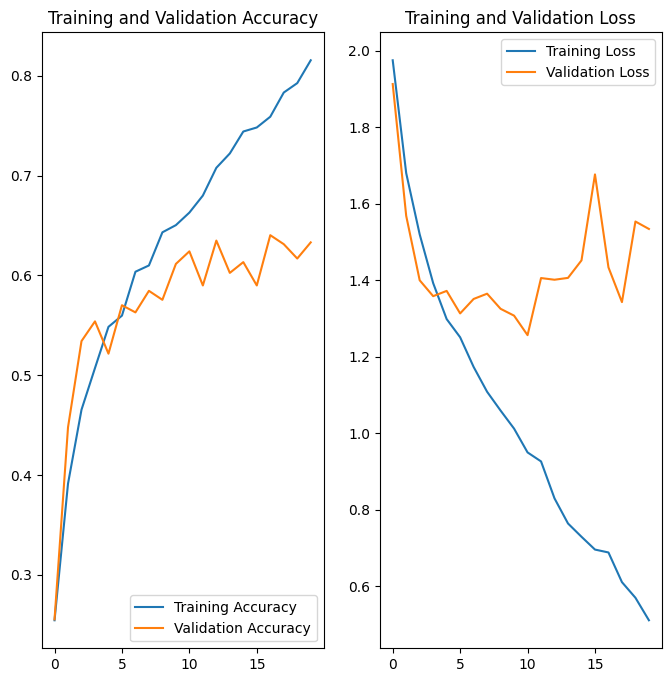

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [16]:
loss, accuracy = model.evaluate(train_ds, verbose=1,)
loss_v, accuracy_v = model.evaluate(val_ds, verbose=1)

print("Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss: ",loss)
print("Validation Loss", loss_v)

70/70 ━━━━━━━━━━━━━━━━━━━━ 49s 694ms/step - accuracy: 0.8689 - loss: 0.3680
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 610ms/step - accuracy: 0.6345 - loss: 1.5973
Accuracy:  0.8666965961456299
Validation Accuracy:  0.633093535900116
Loss:  0.3690832555294037
Validation Loss 1.5341907739639282


**Insights :**

**Training and Validation Accuracy Graph:**

1) Observe the overall trend of both training and validation accuracy curves. Ideally, both should increase over epochs.

2) A significant gap between training and validation accuracy indicates overfitting. This means the model is performing well on training data but poorly on unseen data.

**Training and Validation Loss Graph:**

1) The loss curves should generally decrease over epochs, indicating the model is learning and minimizing errors.

2) Similar to accuracy, a large gap between training and validation loss indicates overfitting.

we can observe that the validation accuracy of the model has achieved is below 55%, which is relatively low.
We need to apply techniques like Data Augmentation and Dropout to handle the overfitting issue of our model.

## Data Augmentation

In [17]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

image_class = ['nevus','melanoma','basal_cell_caricoma','actinic_keratosis','vasc_lesion','dermatofibroma', 'pigmented_keratosis', 'seborrheic_keratosis', 'squamous_carci']

train_batches = datagen.flow_from_directory(data_dir_train,
    target_size = (180,180),
    classes = image_class,
    batch_size = 64
 )

valid_batches = datagen.flow_from_directory(data_dir_test,
    target_size = (180,180),
    classes = image_class,
    batch_size = 64
)

Found 935 images belonging to 9 classes.
Found 54 images belonging to 9 classes.


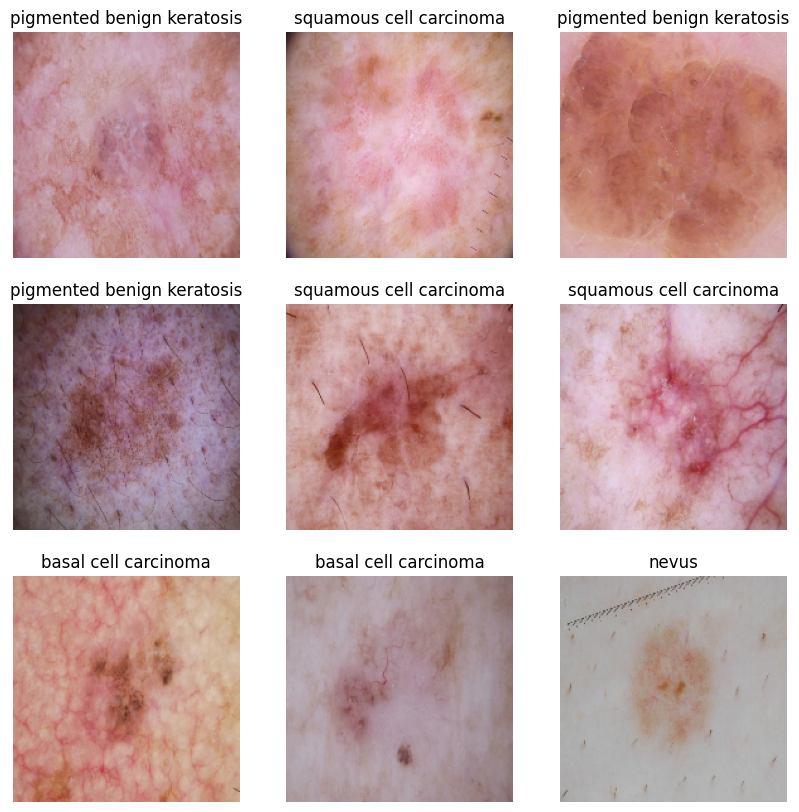

In [18]:
# visualize augmentation strategy works for one instance of training image.
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

## Create the model, compile and train the model

In [21]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)
num_classes = 9
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

## Compiling the model

In [22]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# View the summary of all layers
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_4 (Sequential)            │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_3 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,989,801 (15.22 MB)

 Trainable params: 3,989,801 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

## Training the model

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - accuracy: 0.1953 - loss: 2.3385 - val_accuracy: 0.2982 - val_loss: 1.9327
Epoch 2/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.2949 - loss: 1.8800 - val_accuracy: 0.3399 - val_loss: 1.7394
Epoch 3/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.3977 - loss: 1.6851 - val_accuracy: 0.3838 - val_loss: 1.6543
Epoch 4/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.4678 - loss: 1.5205 - val_accuracy: 0.4912 - val_loss: 1.5121
Epoch 5/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.4774 - loss: 1.5060 - val_accuracy: 0.4890 - val_loss: 1.5401
Epoch 6/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.5165 - loss: 1.3859 - val_accuracy: 0.4298 - val_loss: 1.6042
Epoch 7/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.5192 - loss: 1.3723 - val_accuracy: 0.5329 - val_loss: 1.4298
Epoch 8/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.5142 - loss: 1.3474 - val_accuracy: 0.4825 - v

## Visualizing the results

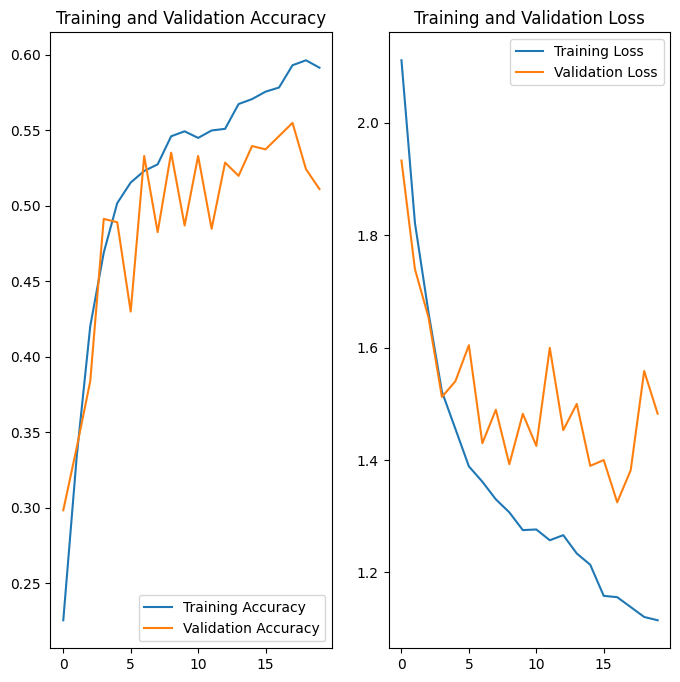

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


**Insights :**

The gap between the training and validation accuracy/loss curves has significantly reduced compared to the previous graph, and the highest accuracy achieved is around 60%. This indicates that data augmentation and dropout have helped in reducing overfitting, making the model generalize better to unseen data.
However, there is still scope for further to increase the accuracy of the model.

## Distribution of classes in the training dataset

**Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [ ]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
dataframe_dict_original = dict(zip(path_list, lesion_list))
df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
df

,Path,Label
0,/content/drive/My Drive/Skin cancer ISIC The I...,vascular lesion
1,/content/drive/My Drive/Skin cancer ISIC The I...,vascular lesion
2,/content/drive/My Drive/Skin cancer ISIC The I...,vascular lesion
3,/content/drive/My Drive/Skin cancer ISIC The I...,vascular lesion
4,/content/drive/My Drive/Skin cancer ISIC The I...,vascular lesion
...,...,...
2279,/content/drive/My Drive/Skin cancer ISIC The I...,dermatofibroma
2280,/content/drive/My Drive/Skin cancer ISIC The I...,dermatofibroma
2281,/content/drive/My Drive/Skin cancer ISIC The I...,dermatofibroma
2282,/content/drive/My Drive/Skin cancer ISIC The I...,dermatofibroma


Class=vascular lesion, n=139 (6.086%)
Class=squamous cell carcinoma, n=181 (7.925%)
Class=nevus, n=367 (16.068%)
Class=melanoma, n=473 (20.709%)
Class=pigmented benign keratosis, n=462 (20.228%)
Class=actinic keratosis, n=114 (4.991%)
Class=basal cell carcinoma, n=376 (16.462%)
Class=seborrheic keratosis, n=77 (3.371%)
Class=dermatofibroma, n=95 (4.159%)


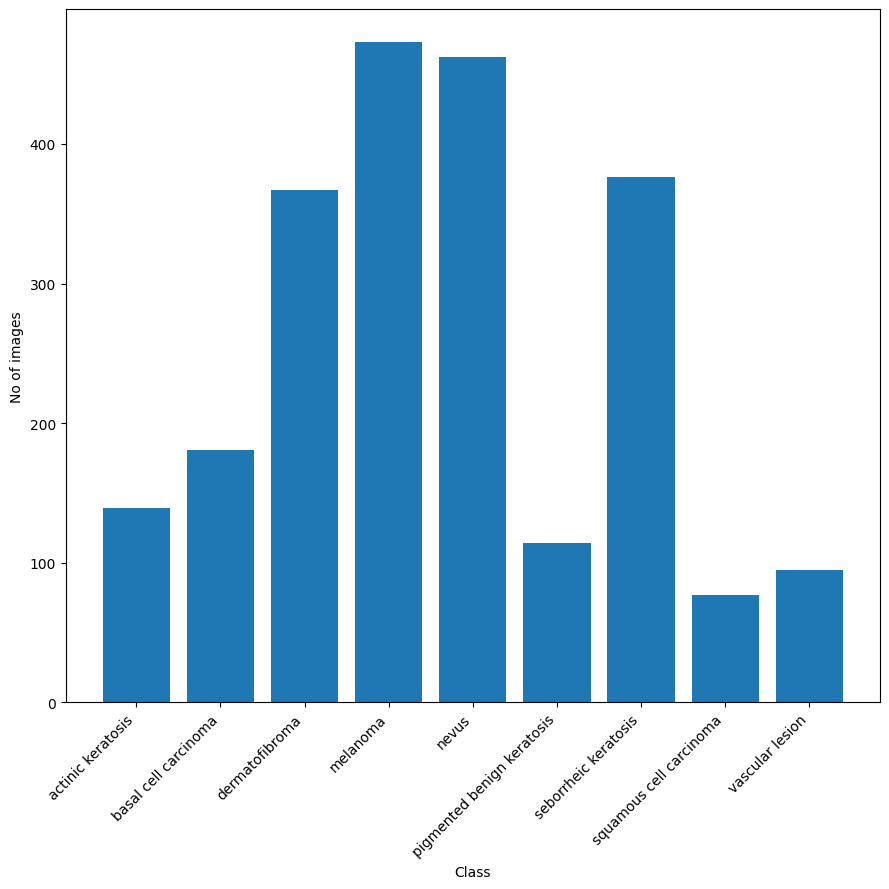

In [ ]:

from sklearn.preprocessing import LabelEncoder
from collections import Counter
import matplotlib.pyplot as plt

X, y = df['Path'], df['Label']
le = LabelEncoder()
y_encoded = le.fit_transform(y)

counter = Counter(y_encoded)
class_names = list(le.classes_) # Get the original class names

for k,v in counter.items():
  per = v / len(y) * 100
  print(f'Class={class_names[k]}, n={v} ({per:.3f}%)')

plt.figure(figsize=(9,9)) # Adjust figure size for better visualization
plt.bar(class_names, counter.values())
plt.xlabel("Class")
plt.ylabel("No of images")
plt.xticks(rotation=45, ha="right") # Rotate x-axis labels for readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

**Insights :**
**- Which class has the least number of samples?**

From the above bar chart we can see that the class seborrheric keratosis has the least number of samples.

**- Which classes dominate the data in terms proportionate number of samples?**

We can observe that of all the class and found that the class pigmented benign kerotosis has the most number of samples which dominate the data in terms proportionate number of samples.

## Rectify the class imbalance

In [23]:
#Install Augmentor

!pip install Augmentor

In [24]:
# Define the path to the training dataset
path_to_training_dataset = "/content/drive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"

# Import the Augmentor library
import Augmentor

# Loop through each class and perform data augmentation
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i) # Create an Augmentor pipeline for the current class
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)# Apply rotation augmentation with specified parameters
    p.sample(500) ## 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/drive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7D42BD4849D0>: 100%|██████████| 500/500 [00:30<00:00, 16.35 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/drive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7D42BC1CB490>: 100%|██████████| 500/500 [00:26<00:00, 19.07 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/drive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7D42BD466DD0>: 100%|██████████| 500/500 [00:26<00:00, 18.57 Samples/s]


Initialised with 473 image(s) found.
Output directory set to /content/drive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7D434C40DA80>: 100%|██████████| 500/500 [01:38<00:00,  5.09 Samples/s]


Initialised with 367 image(s) found.
Output directory set to /content/drive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7D42BD454970>: 100%|██████████| 500/500 [01:35<00:00,  5.24 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/drive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7D434C4B3C70>: 100%|██████████| 500/500 [00:24<00:00, 20.34 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/drive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7D42BC1A7E50>: 100%|██████████| 500/500 [00:52<00:00,  9.45 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/drive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7D42B4DEDF00>: 100%|██████████| 500/500 [00:24<00:00, 20.51 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/drive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7D42BC1C3B80>: 100%|██████████| 500/500 [00:27<00:00, 18.33 Samples/s]


In [ ]:
# Count the Total Number of Augmented Images Generated by Augmentor

# Count the number of image files in the 'output' subdirectories of each class
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))

# Print the total count of augmented images
print("Total number of augmented images:", image_count_train)

Total number of augmented images: 4500


Checking the distribution of augmented data after adding new images to the original training data.

In [ ]:
path_list = [x for x in glob(os.path.join(path_to_training_dataset, '*','output', '*.jpg'))]
path_list[:5]

['/content/drive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output/vascular lesion_original_ISIC_0026490.jpg_5848b884-2517-4299-9cc0-d55da1ed9ba0.jpg',
 '/content/drive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output/vascular lesion_original_ISIC_0025873.jpg_26bfb611-1dec-4f54-a35e-c179bdd14fbd.jpg',
 '/content/drive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output/vascular lesion_original_ISIC_0025599.jpg_a583e754-440d-44eb-9e9e-ade7becce1d2.jpg',
 '/content/drive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output/vascular lesion_original_ISIC_0033991.jpg_26d03b0d-8c67-46fe-a82e-bd54a38da3d2.jpg',
 '/content/drive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output/vascular lesion_original_ISIC_0027903.jpg_f32a46d6-ca82-4255-a106-d65064ef8

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(path_to_training_dataset, '*','output', '*.jpg'))]
lesion_list_new[:5]

['vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion']

In [ ]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [ ]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = df._append(df2)

In [ ]:
new_df['Label'].value_counts()

,count
Label,
melanoma,973
pigmented benign keratosis,962
basal cell carcinoma,876
nevus,867
squamous cell carcinoma,681
vascular lesion,639
actinic keratosis,614
dermatofibroma,595
seborrheic keratosis,577


## Train the model on the data created using Augmentor

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

## Create a training dataset

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6784 files belonging to 9 classes.
Using 5428 files for training.


## Create a validation dataset

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6784 files belonging to 9 classes.
Using 1356 files for validation.


## CNN Model

In [ ]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## Compile the model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Train the model

In [ ]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
170/170 ━━━━━━━━━━━━━━━━━━━━ 45s 253ms/step - accuracy: 0.1797 - loss: 2.1549 - val_accuracy: 0.3127 - val_loss: 1.7782
Epoch 2/30
170/170 ━━━━━━━━━━━━━━━━━━━━ 79s 235ms/step - accuracy: 0.3629 - loss: 1.6529 - val_accuracy: 0.4255 - val_loss: 1.5409
Epoch 3/30
170/170 ━━━━━━━━━━━━━━━━━━━━ 41s 234ms/step - accuracy: 0.4443 - loss: 1.4501 - val_accuracy: 0.4727 - val_loss: 1.3612
Epoch 4/30
170/170 ━━━━━━━━━━━━━━━━━━━━ 41s 237ms/step - accuracy: 0.4708 - loss: 1.3711 - val_accuracy: 0.4742 - val_loss: 1.4391
Epoch 5/30
170/170 ━━━━━━━━━━━━━━━━━━━━ 41s 237ms/step - accuracy: 0.4939 - loss: 1.3253 - val_accuracy: 0.5428 - val_loss: 1.2339
Epoch 6/30
170/170 ━━━━━━━━━━━━━━━━━━━━ 43s 248ms/step - accuracy: 0.5360 - loss: 1.2246 - val_accuracy: 0.5088 - val_loss: 1.2940
Epoch 7/30
170/170 ━━━━━━━━━━━━━━━━━━━━ 80s 239ms/step - accuracy: 0.5518 - loss: 1.1774 - val_accuracy: 0.5597 - val_loss: 1.1680
Epoch 8/30
170/170 ━━━━━━━━━━━━━━━━━━━━ 43s 249ms/step - accuracy: 0.5488 - loss: 1

## Visualize the model results

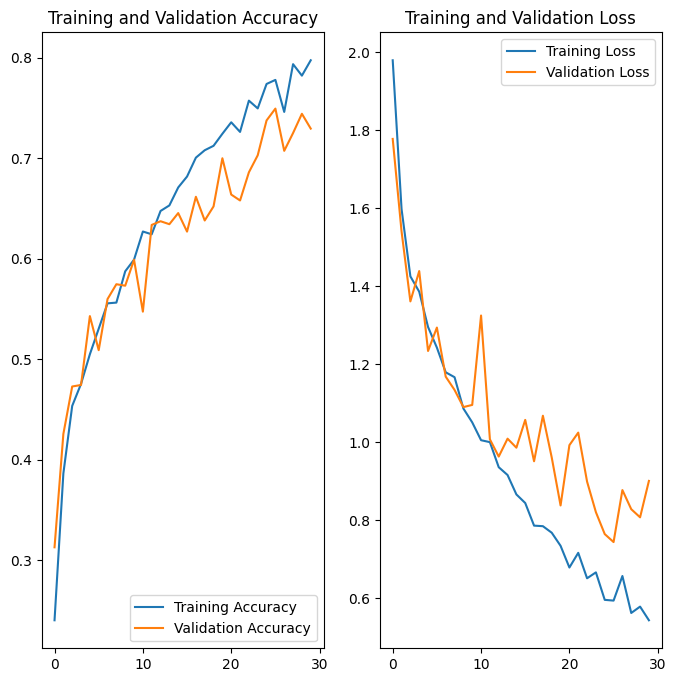

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Insights:
1.Training accuracy increases linearly over time, where as the validation accuracy increases in training process.<br>
2.Training loss decreases with epochs the validation loss also decreases.<br>
3.The plots show that gap between training accuracy and validation accuracy have decreased significantly from previous model, and it has achieved around 75% accuracy on the validation set.<br>
4.The difference in accuracy between training and validation accuracy is very less
5.Class rebalancing not only got rid of overfitting it also improved the accuracy from 60% to 80%.

## Model evaluation

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Actual Class: seborrheic keratosis
Predicted Class: seborrheic keratosis


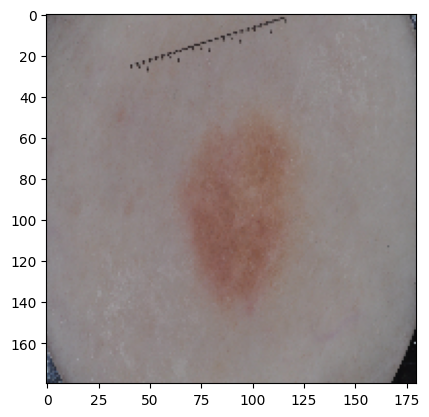

In [53]:
#Evaluate model on one of test instance

from glob import glob

# Construct the path to a test image
test_image_path = os.path.join(data_dir_test, class_names[6], '*')

# Get a list of all test images for the selected class
test_images = glob(test_image_path)

# Load the last test image in the list
test_image = load_img(test_images[1], target_size=(180, 180, 3))

# Display the test image
plt.imshow(test_image)
plt.grid(False)

# Expand dimensions to match the input shape of the model
img = np.expand_dims(test_image, axis=0)

# Make predictions using the trained model
pred = model.predict(img)

# Get the index of the predicted class with the highest probability
pred = np.argmax(pred)

# Get the predicted class name
pred_class = class_names[pred]

# Print the actual and predicted class names
print("Actual Class: " + class_names[6])
print("Predicted Class: " + pred_class)